# Heart Disease Prediction

In [1248]:
# importing the dataset

import pandas as pd
df = pd.read_csv('heart.csv')

## 1. Understanding the Data

The dataset consists of the following 13 features:
1. age *(continuous)*
2. sex *(categorical)*
3. chest pain type *(categorical - 4 values)*
4. resting blood pressure *(continuous)*
5. serum cholestoral in mg/dl *(continuous)*
6. fasting blood sugar *(categorical > 120 mg/dl )*
7. resting electrocardiographic results *(categorical - values 0,1,2)*
8. maximum heart rate achieved *(continuous)*
9. exercise induced angina *(categorical)*
10. oldpeak = ST depression induced by exercise relative to rest *(continuous)*
11. the slope of the peak exercise ST segment *(categorical)*
12. number of major vessels *(categorical - values 0-3)*
13. thal *(categorical 0 = normal; 1 = fixed defect; 2 = reversable defect)*

Below are some statistics from the data.

In [1249]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### 1.1 Boxplots for all continuous Features

In [1250]:
numerical_columns = list(df.loc[:,['age', 'trestbps','chol', 'thalach', 'oldpeak']])
categorical_columns = list(df.loc[:,['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']])

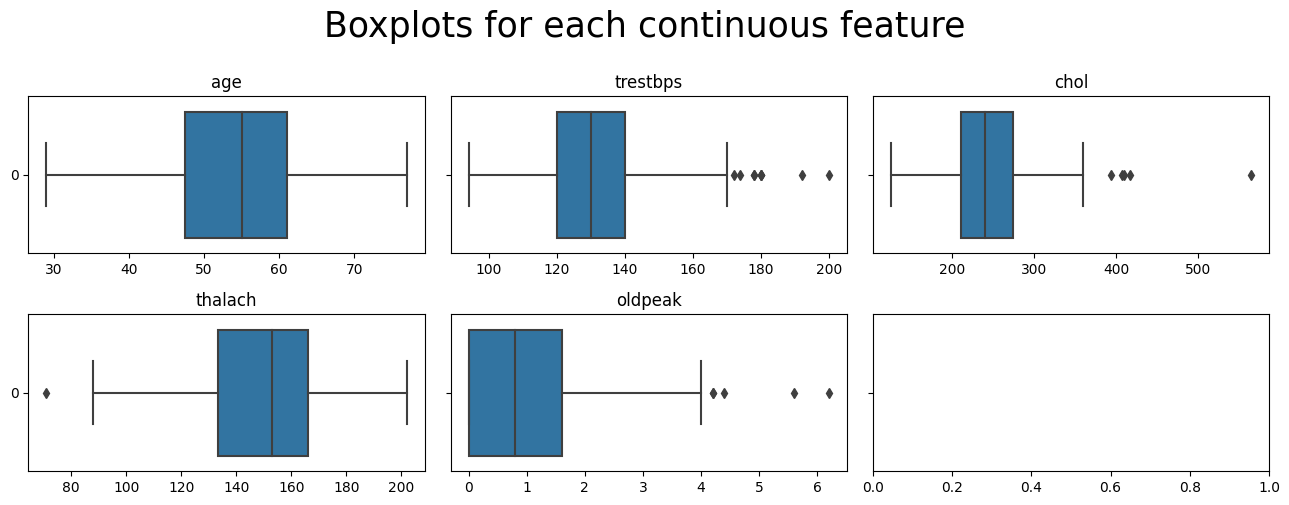

In [1251]:
import matplotlib.pyplot as plt
import seaborn as sns
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(13,5))
    fig.suptitle('Boxplots for each continuous feature',y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numerical_columns, rows=2, cols=3)
plt.tight_layout()

We can observe that almost all the numerical features contain a few outliers

### 1.2 Histograms for all continuous features

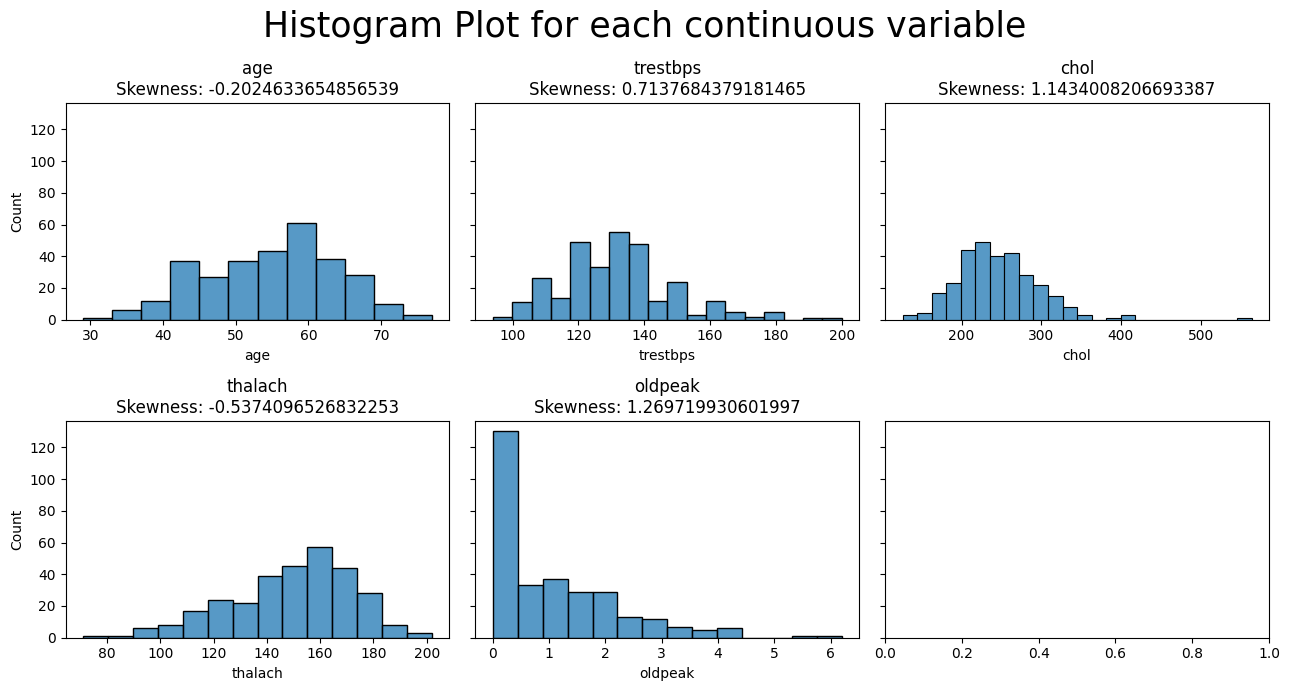

In [1252]:
def colDistri(dataset,columns_list, rows, cols, sp, width, height):

    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(width,height))
    fig.suptitle('Histogram Plot for each '+ sp +' variable', fontsize=25)
    axs = axs.flatten()


    for i, data in enumerate(columns_list):
        sns.histplot(data=dataset, x = data, ax=axs[i])
        if sp == "continuous":
            skewness = dataset[data].skew(axis = 0, skipna = True)
            axs[i].set_title(data +'\nSkewness: ' + str(skewness))
        else:
            axs[i].set_title(data)

colDistri(df, numerical_columns, 2, 3, "continuous", 13, 7)
plt.tight_layout()

We can see that only the age feature can be considered as normally distributed. We have to take that into account when deciding on the outlier detection methods.

### 1.3 Histograms for all categorical values

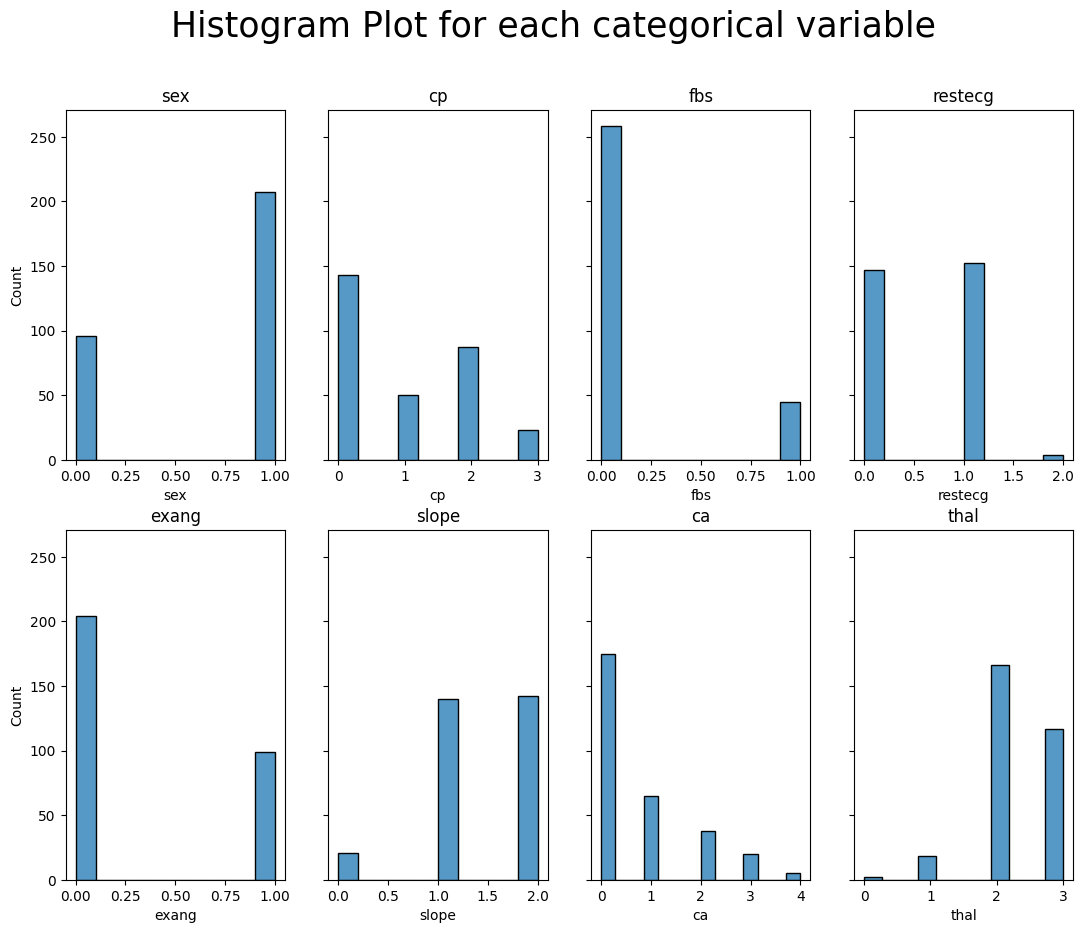

In [1253]:
colDistri(df, categorical_columns, 2, 4, "categorical", 13, 10)

### 1.4 Visualizing Data for Affected Patients

In this part of our pipeline, we filtered out the affected patients (target = 1), in order to visualize and gain more insight about the data. We plotted 2 graphs, a graph which shows the proportion of affected males in comparison to females, and a graph that shows the number of affected patients for each age group.

In [1254]:
#Filtering out only the patients with heart diseases
with_disease = df[df['target'].isin([1])]
with_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [1255]:
gender_counts = with_disease.sex.value_counts()
gender_counts

1    93
0    72
Name: sex, dtype: int64

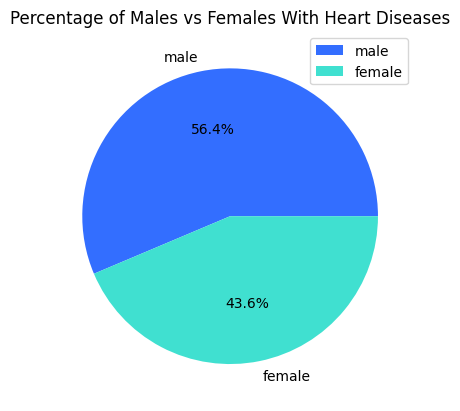

In [1256]:
import matplotlib.pyplot as plt
import seaborn
plt.pie(gender_counts, labels = ["male", "female"],colors = ["#336EFF","turquoise"],autopct='%1.1f%%',)
plt.title("Percentage of Males vs Females With Heart Diseases")
plt.legend()
plt.show()

The following pie chart shows us that the percentage of overall affected males is larger than the percentage of the affected females by a considerable margin.

In [1257]:
with_disease['age_group']=pd.cut(with_disease['age'],
                               bins=[28, 40, 50, 60, 999], 
                               labels=['29-40', '41-50', '51-60','60+'])
with_disease

C:\Users\uscs\AppData\Local\Temp\ipykernel_9656\1853143736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_disease['age_group']=pd.cut(with_disease['age'],


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60+
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,29-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41-50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,51-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1,51-60
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1,51-60
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1,41-50
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,29-40


In order to plot the bar chart of affected patients for different age groups, the first thing we need to do is categorize the age. This was done by dividing our data into 4 different age groups which are: 29-40, 41-50, 51-60 and 60+.

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Number of Patients')]

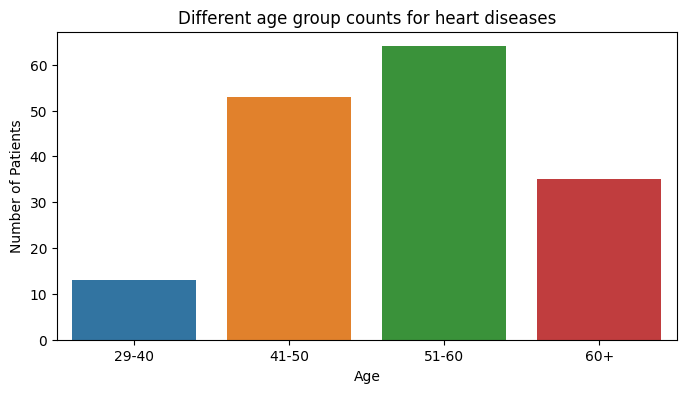

In [1258]:
import seaborn as sns
age_group_counts = with_disease.age_group.value_counts()
plt.figure(figsize=(8, 4))
plt.title("Different age group counts for heart diseases")
ax=sns.barplot(x=age_group_counts.index, y=age_group_counts);
ax.set(xlabel='Age', ylabel='Number of Patients')

## 2. Preprocessing

### 2.1 Checking for missing data

In [1259]:
print (df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


No missing values were detected. Therefore no need for data filling techniques

### 2.2 Detecting Outliers

We considered 2 methods for outlier detection: Inter Quartile Range and Z score. We detected and removed outliers in the numerical features only (age, trestbps, chol, thalach, oldpeak)

#### 2.2.1 Inter Quartile Range (IQR) 
IQR is one of the most extensively used procedure for outlier detection and removal It's so versatile because **it makes no distributional assumptions**. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

In [1260]:

def IQR_method (df,features):
   outliers_frame = pd.DataFrame()
   for col in features:
      q1=df[col].quantile(0.25)

      q3=df[col].quantile(0.75)

      IQR=q3-q1

      upper_limit = q3+1.5*IQR
      lower_limit = q1-1.5*IQR

      outliers_frame = outliers_frame.append( df[(df[col]<lower_limit)|(df[col]>upper_limit)])

      df = df[~((df[col]<lower_limit)|(df[col]>upper_limit))]
   
   return outliers_frame

In [1261]:
# detecting outliers

outliers_IQR = IQR_method(df, numerical_columns)
display(outliers_IQR)
print (outliers_IQR.shape[0] , " Outliers have been detected using the IQR method")

C:\Users\uscs\AppData\Local\Temp\ipykernel_9656\1772861475.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_frame = outliers_frame.append( df[(df[col]<lower_limit)|(df[col]>upper_limit)])
C:\Users\uscs\AppData\Local\Temp\ipykernel_9656\1772861475.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_frame = outliers_frame.append( df[(df[col]<lower_limit)|(df[col]>upper_limit)])
C:\Users\uscs\AppData\Local\Temp\ipykernel_9656\1772861475.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_frame = outliers_frame.append( df[(df[col]<lower_limit)|(df[col]>upper_limit)])
C:\Users\uscs\AppData\Local\Temp\ipykernel_9656\1772861475.py:13: FutureWarning: The frame.append method is deprecated and will be

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1


19  Outliers have been detected using the IQR method


#### 2.2.2 Z-score

Z-Score is a highly efficient way of detecting and removing outliers. The main issue with it is that it only works with the data which is completely or close to normally distributed, which means that this method is not for skewed data, either left skew or right skew.

In [1262]:
def z_score_method(df, features):
    outliers_frame = pd.DataFrame()
    for col in features:
        upper_limit = df[col].mean() + 3*df[col].std()
        lower_limit = df[col].mean() - 3*df[col].std()
        outliers_frame =outliers_frame.append( df[(df[col] > upper_limit) | (df[col] < lower_limit)])
        df = df[~(df[col] > upper_limit) | (df[col] < lower_limit)]
    return outliers_frame

In [1263]:
outliers_z_score= z_score_method(df, numerical_columns)
display(outliers_z_score)
print (outliers_z_score.shape[0] , " Outliers have been detected using the Z-score method")

C:\Users\uscs\AppData\Local\Temp\ipykernel_9656\3828219604.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_frame =outliers_frame.append( df[(df[col] > upper_limit) | (df[col] < lower_limit)])
C:\Users\uscs\AppData\Local\Temp\ipykernel_9656\3828219604.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_frame =outliers_frame.append( df[(df[col] > upper_limit) | (df[col] < lower_limit)])
C:\Users\uscs\AppData\Local\Temp\ipykernel_9656\3828219604.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_frame =outliers_frame.append( df[(df[col] > upper_limit) | (df[col] < lower_limit)])
C:\Users\uscs\AppData\Local\Temp\ipykernel_9656\3828219604.py:6: FutureWarning: The frame.append method is deprecated 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


9  Outliers have been detected using the Z-score method


#### 2.2.3 Deleting outliers

Z-score outlier detection and IQR outlier detection yielded different results. From the historgrams sketched above, we can see that none of the features have normal distribution. Therefore, the result generated from the Z-score outlier detection is not accurate because the Z-score method assumes that data is normally distributed. 

Therefore, we will delete the outliers detected using the IQR method

In [1264]:
df = pd.concat([df, outliers_IQR]).drop_duplicates(keep=False)
print("The dataframe now consists of ", df.shape[0], " rows")

The dataframe now consists of  282  rows


### 2.3 Data Standardization

In order to measure the correlation between features, we first need to standardize the data, so that all features can have the same range. This is done to ensure that no feature has more effect on correlation and other metrics than the others. The MinMax scaler was used for this step, and it was used because outliers were already filtered out, hence the maximum and minimum values of the data

In [1265]:
from sklearn.preprocessing import MinMaxScaler
def scaler(df,arr):
    dataframe_N=df[arr]
    scale = MinMaxScaler(feature_range=(0,1))
    norm_data=scale.fit_transform(dataframe_N)
    return norm_data
df[numerical_columns]=scaler(df,numerical_columns)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.671053,0.457265,1,0,0.543860,0,0.575,0,0,1,1
1,0.166667,1,2,0.473684,0.529915,0,1,0.868421,0,0.875,0,0,2,1
2,0.250000,0,1,0.473684,0.333333,0,0,0.736842,0,0.350,2,0,2,1
3,0.562500,1,1,0.342105,0.470085,0,1,0.789474,0,0.200,2,0,2,1
4,0.583333,0,0,0.342105,0.974359,0,1,0.657895,1,0.150,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0,0.605263,0.491453,0,1,0.307018,1,0.050,1,0,3,0
299,0.333333,1,3,0.210526,0.589744,0,1,0.385965,0,0.300,1,0,3,0
300,0.812500,1,0,0.657895,0.286325,1,1,0.464912,0,0.850,1,2,3,0
301,0.583333,1,0,0.473684,0.021368,0,1,0.236842,1,0.300,1,1,3,0


#### Visualizing correlations

<AxesSubplot: >

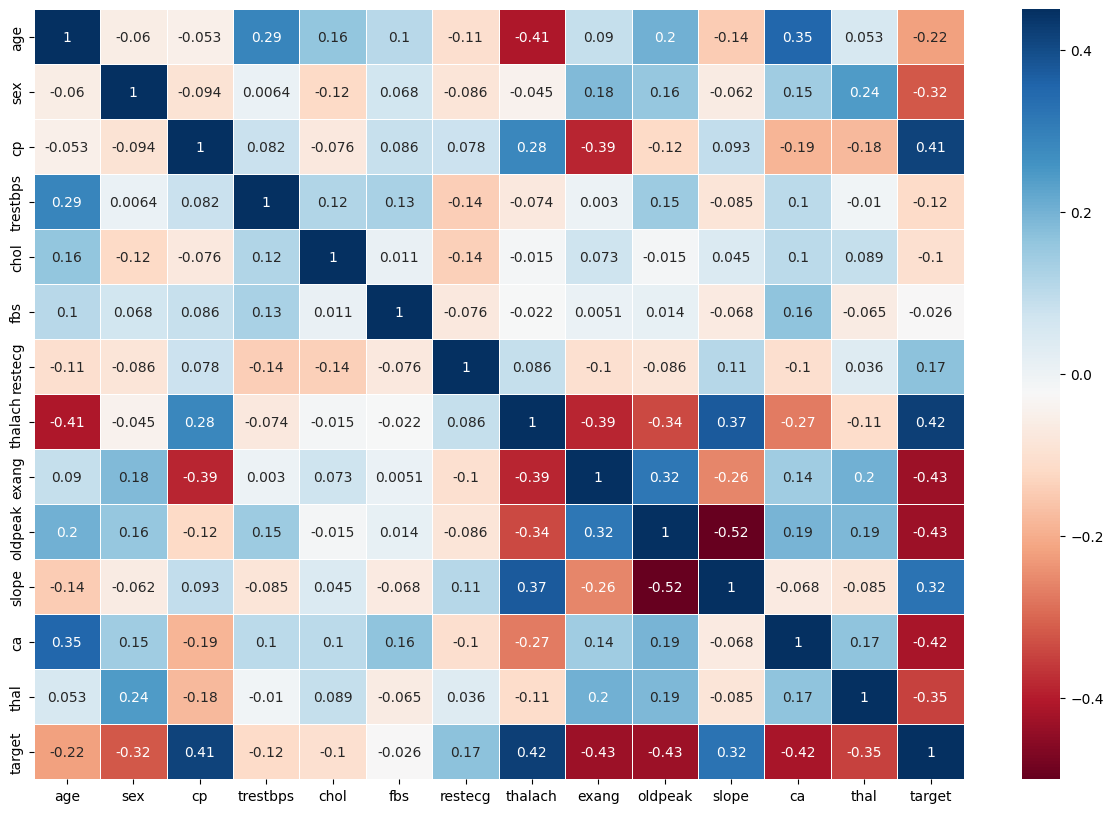

In [1266]:
import numpy as np
corr_matrix = df.corr(method='pearson', numeric_only=True)
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', linewidths=0.5, vmin = -0.5, vmax = 0.45)

#### Extracting strong relations

In [1267]:
lower_triangle = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))
strong_thresh = 0.4
strong_relations = []
for row in lower_triangle.index:
    for col in lower_triangle.columns:
        corr = lower_triangle[row][col]
        if corr >= strong_thresh or corr <= -strong_thresh:
            strong_relations.append([row,col,corr])
print(strong_relations)


[['age', 'thalach', -0.40774836267557535], ['cp', 'target', 0.4145063829399915], ['thalach', 'target', 0.42071289254095473], ['exang', 'target', -0.430405057823935], ['oldpeak', 'slope', -0.5236405058765344], ['oldpeak', 'target', -0.43244558796699595], ['ca', 'target', -0.41733204198718815]]


#### Visualizing strong relations

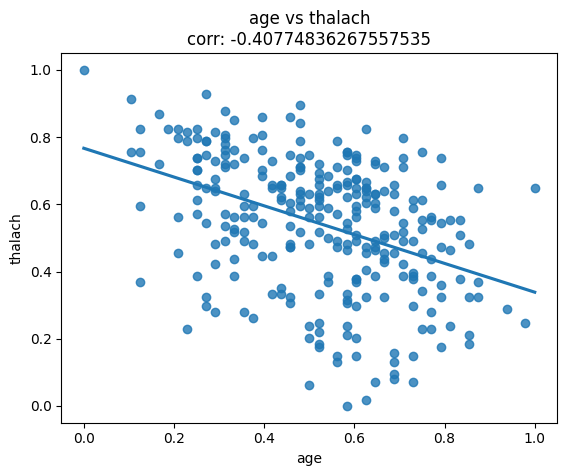

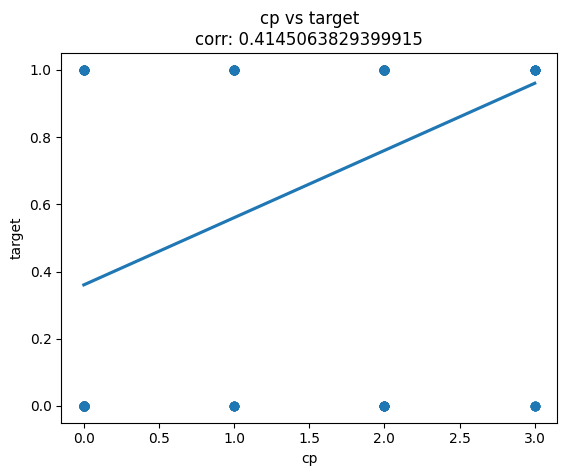

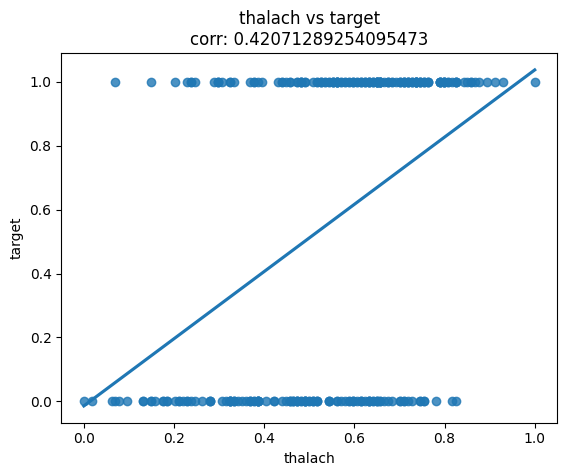

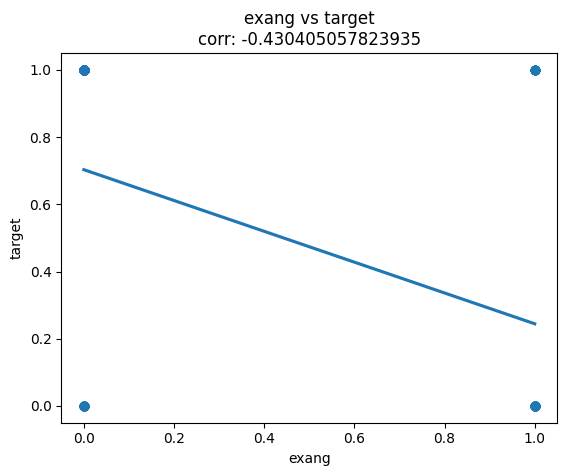

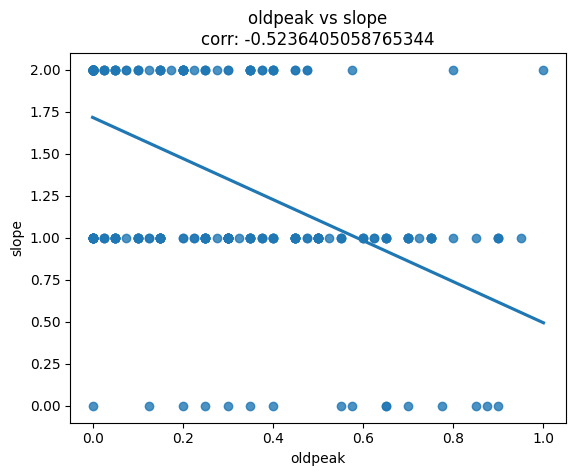

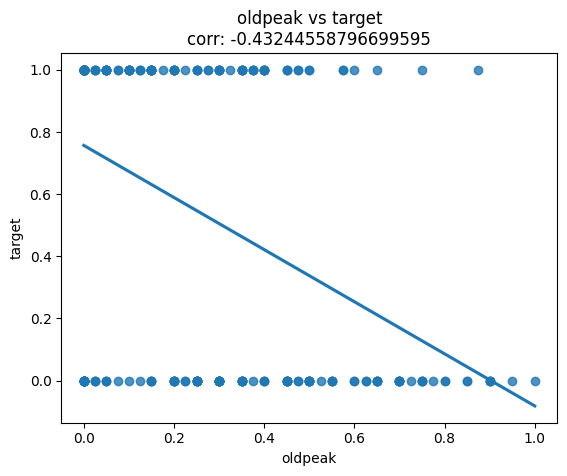

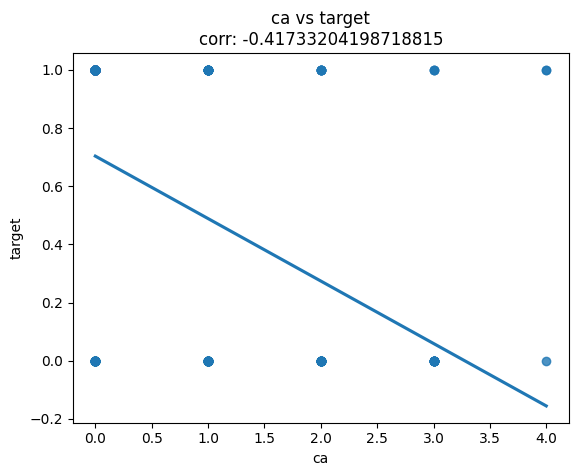

In [1268]:
for relation in strong_relations:
    x = relation[0]
    y = relation[1]
    corr = relation[2]
    plt.figure()
    sns.regplot(x=x, y=y, data=df[[x,y]], fit_reg=True, ci=None)
    plt.title(f"{x} vs {y}\ncorr: {corr}")

In [1269]:
#sns.pairplot(df, hue="target")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000225826AC820> (for post_execute):


KeyboardInterrupt: 